In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
from PIL import Image

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


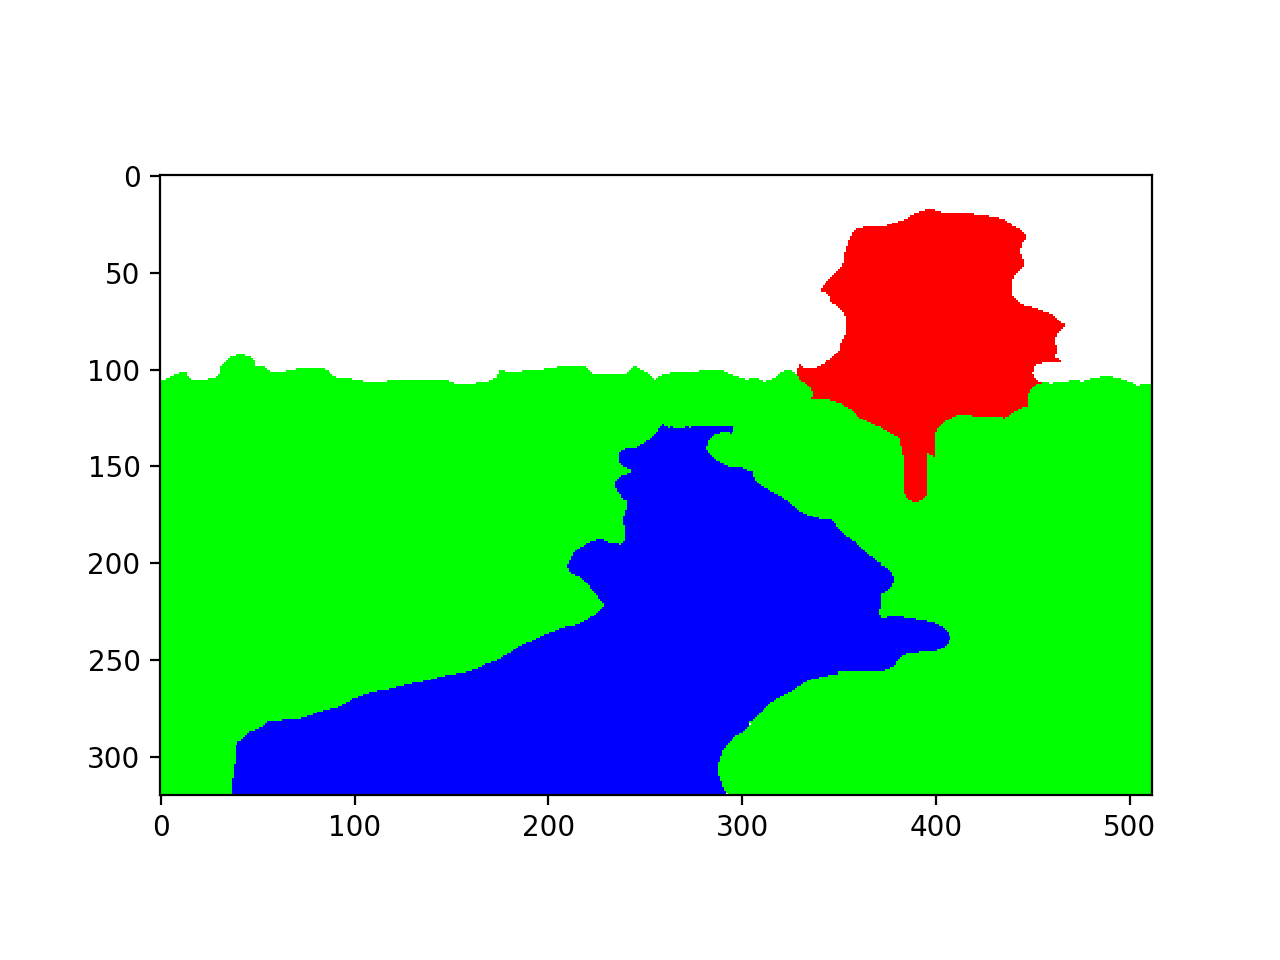

In [70]:
image = mpimg.imread("ideal_target_mask.png")
plt.imshow(image)
plt.show()

In [44]:
image = np.array(image)
new_img = image.transpose(2,0,1).reshape(3,-1)
new_img = new_img.transpose(1,0)


In [45]:
df = pd.DataFrame.from_records(new_img)
df.columns = ["a", "b", "c"]

In [53]:
# colors of target mask 
df.loc[(df['a'].between(0.996 - 0.01 , 0.996 + 0.01)) & (df.b==0) & (df.c==0), 'color'] = 'red'
df.loc[(df.a==0) & (df.b==1) & (df['c'].between(0.0039 - 0.01 , 0.0039 + 0.01)), 'color'] = 'green'
df.loc[(df.a==0) & (df.b==0) & (df['c'].between(0.996 - 0.01 , 0.996 + 0.01)), 'color'] = 'blue'
df.loc[(df.a==1) & (df.b==1) & (df.c==1), 'color'] = 'w'

In [51]:
# # colors of style mask 
# df.loc[(df['a'] == 1) & (df['b'].between(0.2- 0.001 , 0.2+ 0.001)) &(df['c'].between(0.121- 0.01 , 0.121+ 0.01)), 'color'] = 'red'
# df.loc[(df.a==0) & (df.b==1) & (df.c==0), 'color'] = 'green'
# df.loc[(df.a==0) & (df.b==0) & (df.c==1), 'color'] = 'blue'
# df.loc[(df.a==1) & (df.b==1) & (df.c==1), 'color'] = 'w'

In [54]:
df.color.unique()

array(['w', nan, 'red', 'green', 'blue'], dtype=object)

In [55]:
new_df = df
new_df.shape

(163840, 4)

In [56]:
train_df = new_df.dropna()
train_df.shape

(152392, 4)

In [57]:
test_df = new_df
test_df.shape

(163840, 4)

In [58]:
test_df_color = test_df['color']
test_df_data = test_df.drop(['color'], axis=1)

train_df_color = train_df['color']
train_df_data = train_df.drop(['color'], axis=1)



In [59]:
logisticRegr = LogisticRegression(solver='newton-cg',multi_class='multinomial')
model = logisticRegr.fit(train_df_data, train_df_color)

In [60]:
test_df_data['color'] = model.predict(test_df_data)

In [61]:
new_full_picture = test_df_data

In [62]:
#white
new_full_picture.loc[new_full_picture.color =='w', 'a'] = 1.0
new_full_picture.loc[new_full_picture.color =='w', 'b'] = 1.0
new_full_picture.loc[new_full_picture.color =='w', 'c'] = 1.0

#blue
new_full_picture.loc[new_full_picture.color =='blue', 'a'] = 0
new_full_picture.loc[new_full_picture.color =='blue', 'b'] = 0
new_full_picture.loc[new_full_picture.color =='blue', 'c'] = 1.0


#green
new_full_picture.loc[new_full_picture.color =='green', 'a'] = 0
new_full_picture.loc[new_full_picture.color =='green', 'b'] = 1.0
new_full_picture.loc[new_full_picture.color =='green', 'c'] = 0

#red


new_full_picture.loc[new_full_picture.color =='red', 'a'] = 1
new_full_picture.loc[new_full_picture.color =='red', 'b'] = 0
new_full_picture.loc[new_full_picture.color =='red', 'c'] = 0




In [63]:
new_full_picture = new_full_picture.drop(['color'], axis=1)


In [64]:
new_full_picture.columns = [0, 1, 2]

In [65]:
new_full_picture = np.array(new_full_picture)


In [66]:
new_full_picture = new_full_picture.transpose(1,0)


In [67]:
new_full_picture = new_full_picture.reshape(3,320,512)

In [68]:
new_full_picture = new_full_picture.transpose(1, 2, 0)


In [69]:
new_full_picture = (new_full_picture * 255).astype('uint8')
img = Image.fromarray(new_full_picture)
img.save('ideal_target_mask.png')
img.show()